In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# for handling imbalancing
from imblearn.under_sampling import NearMiss
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix

import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

# for learning rate decay
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("D:\\archive\\archive-7\\A_Z Handwritten Data.csv")

In [4]:
df.shape

(372450, 785)

In [5]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Data preprocessing

In [6]:
y = df['0']
del df['0']

In [7]:
x = y.replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25], 
              ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])
x

0         A
1         A
2         A
3         A
4         A
         ..
372445    Z
372446    Z
372447    Z
372448    Z
372449    Z
Name: 0, Length: 372450, dtype: object

to remove inbalance within data

In [8]:
nM = NearMiss()
X_data, y_data = nM.fit_resample(df, y)

<Axes: ylabel='count'>

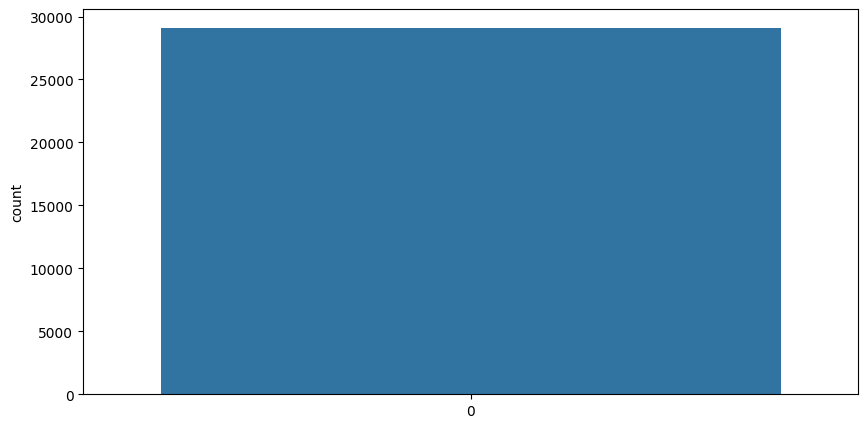

In [9]:
plt.figure(figsize = (10,5))
sns.countplot(y_data)

In [10]:
#One-Hot-Encoding of the target.
y = np_utils.to_categorical(y_data)
# Define the classification of 26 alphabets.
num_classes = y.shape[1]
num_classes

26

In [11]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [12]:
y.shape , X_data.shape

((29120, 26), (29120, 784))

In [13]:
X_data = X_data / 255
X_data

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


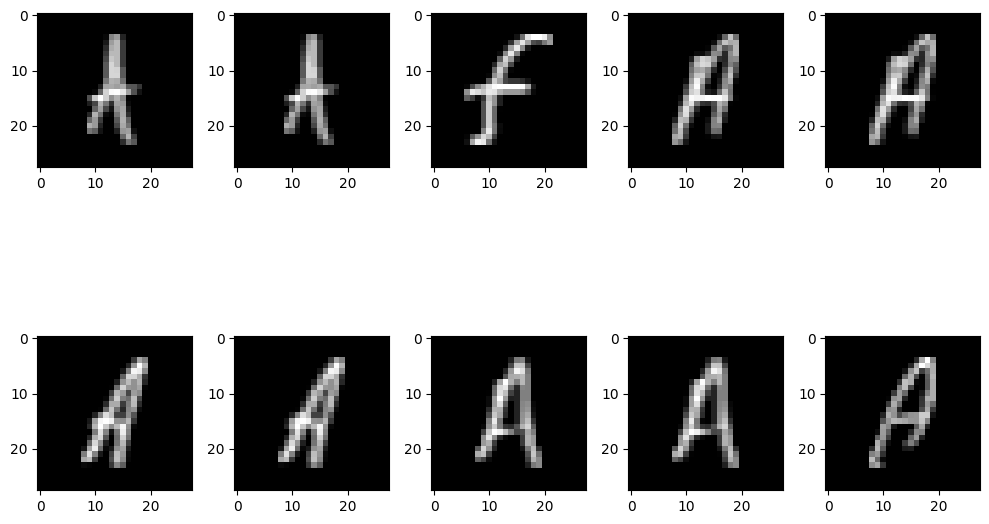

In [14]:
X_data = np.array(X_data)
X_data = X_data.reshape(-1,28,28,1)
# Showing few images

f, ax = plt.subplots(2,5)
f.set_size_inches(10,10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_data[k].reshape(28,28), cmap='gray')
        k += 1
    plt.tight_layout()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2 ,random_state=102)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23296, 28, 28, 1), (5824, 28, 28, 1), (23296, 26), (5824, 26))

In [17]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 26)                3354      
                                                                 
Total params: 594,138
Trainable params: 594,138
Non-trainable params: 0
__________________________________________________

In [19]:
model.compile(optimizer = Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
a= model.fit(X_train,y_train,epochs=15, batch_size=128, validation_data=(X_test,y_test))

Epoch 1/15
182/182 [==============================] - 9s 43ms/step - loss: 0.4330 - accuracy: 0.8756 - val_loss: 0.1539 - val_accuracy: 0.9547
Epoch 2/15
182/182 [==============================] - 8s 43ms/step - loss: 0.1061 - accuracy: 0.9692 - val_loss: 0.1212 - val_accuracy: 0.9689
Epoch 3/15
182/182 [==============================] - 8s 41ms/step - loss: 0.0688 - accuracy: 0.9787 - val_loss: 0.1066 - val_accuracy: 0.9708
Epoch 4/15
182/182 [==============================] - 8s 43ms/step - loss: 0.0445 - accuracy: 0.9869 - val_loss: 0.1424 - val_accuracy: 0.9698
Epoch 5/15
182/182 [==============================] - 9s 47ms/step - loss: 0.0460 - accuracy: 0.9859 - val_loss: 0.1139 - val_accuracy: 0.9756
Epoch 6/15
182/182 [==============================] - 8s 42ms/step - loss: 0.0353 - accuracy: 0.9892 - val_loss: 0.1222 - val_accuracy: 0.9796
Epoch 7/15
182/182 [==============================] - 8s 45ms/step - loss: 0.0422 - accuracy: 0.9873 - val_loss: 0.1579 - val_accuracy: 0.9696

182/182 [==============================] - 1s 2ms/step


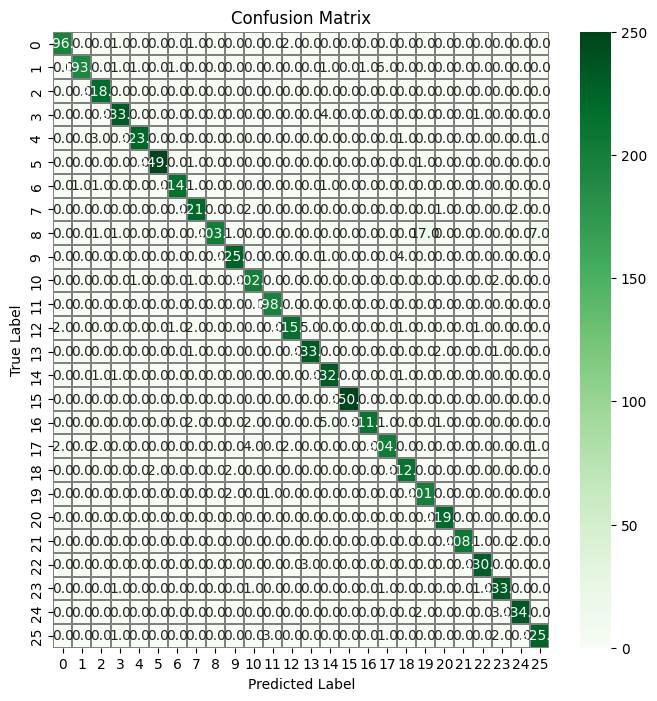

In [28]:
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [31]:
import tensorflow as tf

In [35]:
def load_and_prep_image(filename, img_shape=256):
  
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=32)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

In [36]:
def pred_and_plot(model, filename):
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  
# Plot the image and predicted value
  plt.imshow(img)
  plt.title(f"Prediction: {pred}")
  plt.axis(False);

In [ ]:
pred_and_plot(model,"C:\\Users\\vedan\\OneDrive\\Desktop\\test.jpg")